Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   hours_studied  sleep_hours  attendance_percent  previous_scores  exam_score
0            8.0          8.8                72.1               45        30.2
1            1.3          8.6                60.7               55        25.0
2            4.0          8.2                73.7               86        35.8
3            3.5          4.8                95.1               66        34.0
4            9.1          6.4                89.8               71        40.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours_studied       200 non-null    float64
 1   sleep_hours         200 non-null    float64
 2   attendance_percent  200 non-null    float64
 3   previous_scores     200 non-null    int64  

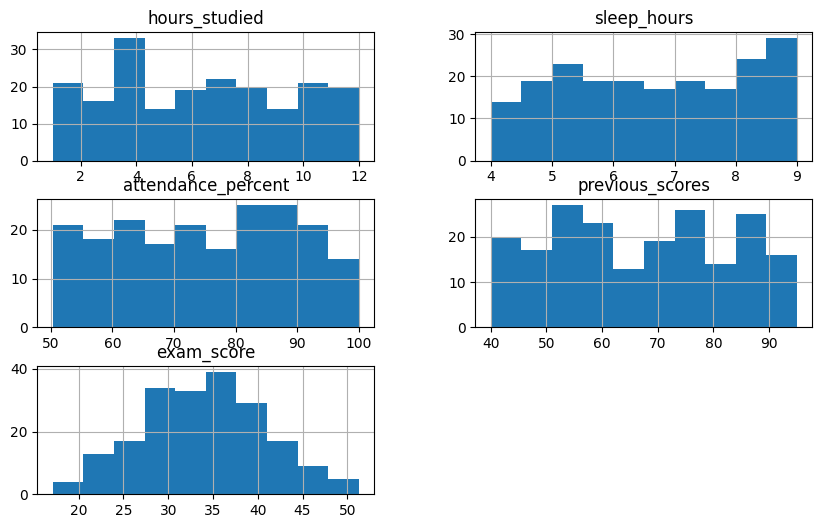

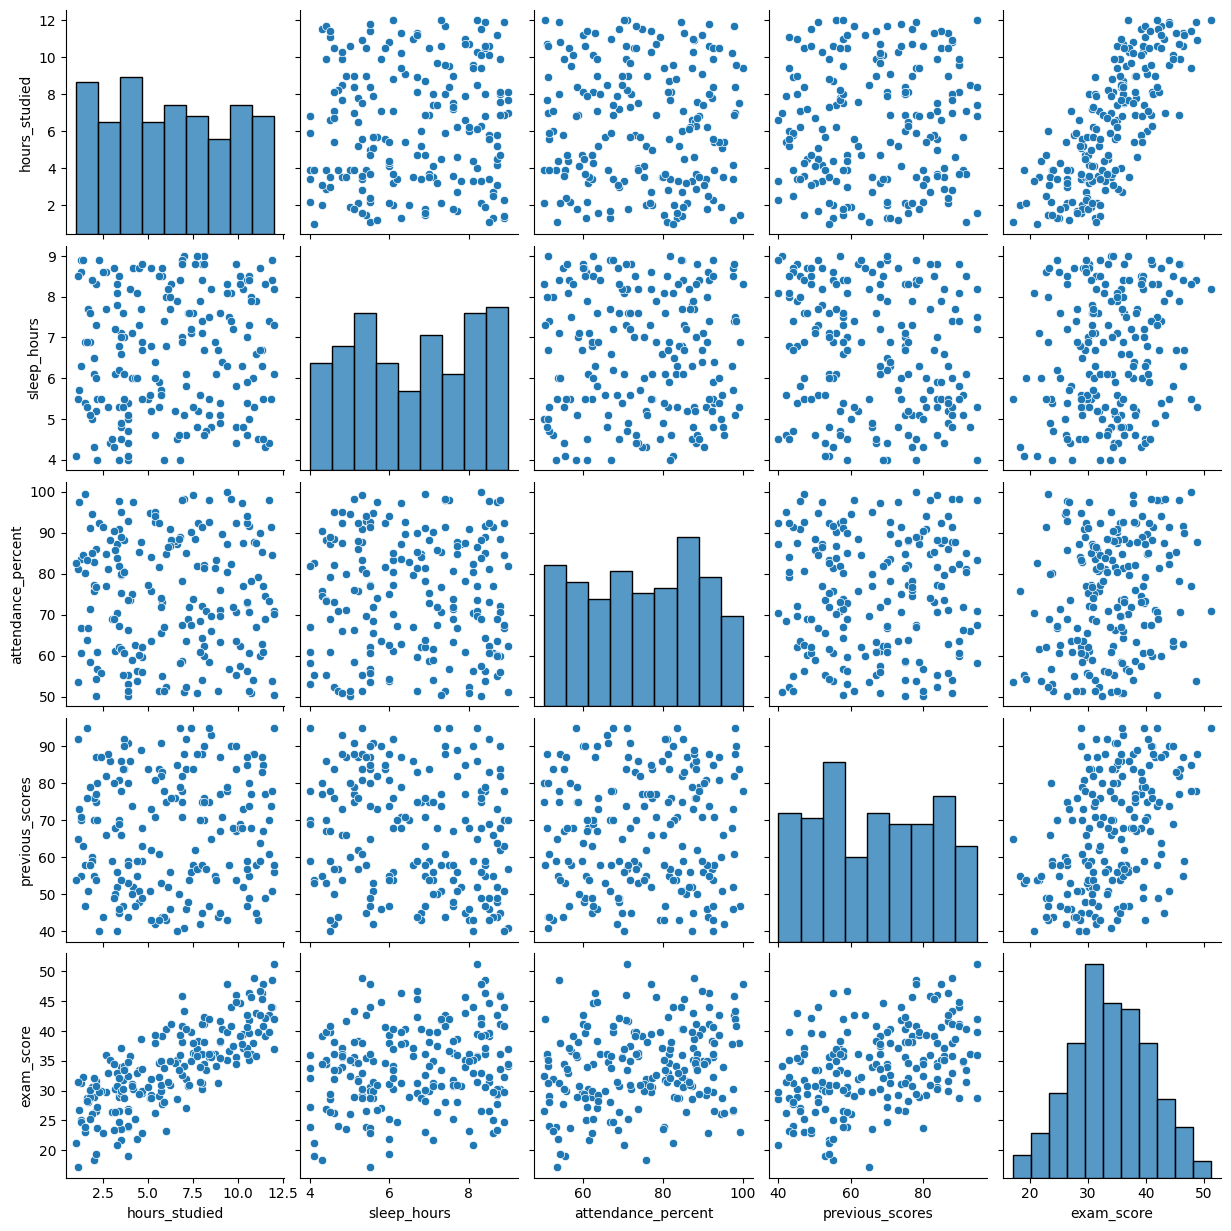

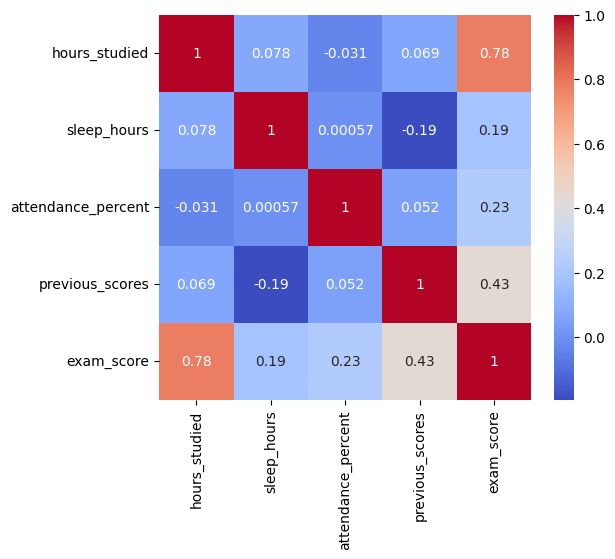

               Model        MSE  R2 Score
0  Linear Regression   7.761783  0.853745
1      Random Forest  10.784704  0.796784
2                SVR   7.823248  0.852587


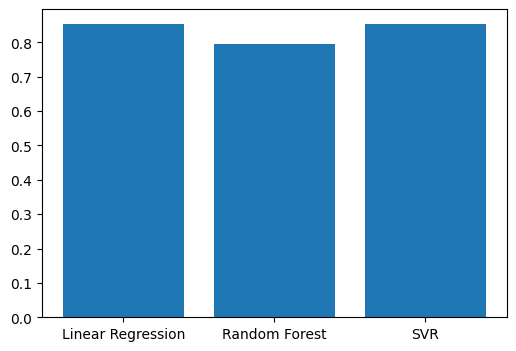

40.43199999999999


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

df = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING/student_exam_scores.csv")
df = df.drop("student_id", axis=1)

print(df.head())
print(df.info())
print(df.describe())

df.hist(bins=10, figsize=(10,6))
plt.show()

sns.pairplot(df)
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

X = df.drop("exam_score", axis=1)
y = df["exam_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_s, y_train)
pred_lr = lr.predict(X_test_s)

rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train_s, y_train)
pred_rf = rf.predict(X_test_s)

params = {"kernel":["linear","rbf"], "C":[0.1,1,10], "gamma":["scale","auto"]}
svr_m = GridSearchCV(SVR(), params, cv=3, scoring="r2")
svr_m.fit(X_train_s, y_train)
pred_svr = svr_m.predict(X_test_s)

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "SVR"],
    "MSE": [
        mean_squared_error(y_test, pred_lr),
        mean_squared_error(y_test, pred_rf),
        mean_squared_error(y_test, pred_svr)
    ],
    "R2 Score": [
        r2_score(y_test, pred_lr),
        r2_score(y_test, pred_rf),
        r2_score(y_test, pred_svr)
    ]
})

print(results)

plt.figure(figsize=(6,4))
plt.bar(results["Model"], results["R2 Score"])
plt.show()

new = [[8, 7.5, 85, 90]]
new_s = scaler.transform(new)
p = rf.predict(new_s)
print(p[0])

In [7]:
print("Enter student details:")
hours = float(input("Hours studied per day: "))
sleep = float(input("Sleep hours: "))
attendance = float(input("Attendance percentage: "))
previous = float(input("Previous exam score: "))
weekly_study = float(input("Total weekly study hours: "))
tuition = int(input("Coaching/Tuition taken (1=Yes, 0=No): "))
assign = float(input("Assignments completed (%): "))
participation = float(input("Class participation (1-10): "))

impact_hours = hours + (weekly_study / 7)
impact_prev = previous + (assign / 10) + (participation * 0.5) + (tuition * 2)

user_data = [[impact_hours, sleep, attendance, impact_prev]]
user_scaled = scaler.transform(user_data)
pred = rf.predict(user_scaled)[0]

print("\nPredicted Exam Score:", round(pred, 2))

Enter student details:
Hours studied per day: 4
Sleep hours: 7
Attendance percentage: 85
Previous exam score: 70
Total weekly study hours: 20
Coaching/Tuition taken (1=Yes, 0=No): 1
Assignments completed (%): 90
Class participation (1-10): 8

Predicted Exam Score: 39.41


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
